In [ ]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor
from src.utils.cross_validation import CrossValidation
from src.models.random_forest_regression import RandomForestRegression

import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor


In [8]:
ds = xr.load_dataset(r'C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor\data\intermediate\CV_results\performance_cube.nc')
ds = ds.squeeze()
ds = ds.mean(dim='cv_fold')
df = ds.to_dataframe().reset_index()
df

,max_depth,min_samples_split,min_samples_leaf,max_features,max_samples,mse,n_estimators,min_weight_fraction_leaf
0,20,2,1,0.5,0.7,0.001857,30,0.0
1,20,2,1,0.5,0.85,0.001804,30,0.0
2,20,2,1,0.5,1.0,0.001765,30,0.0
3,20,2,1,0.5,None,0.001765,30,0.0
4,20,2,1,0.7,0.7,0.001836,30,0.0
...,...,...,...,...,...,...,...,...
535,None,7,5,0.7,None,0.001841,30,0.0
536,None,7,5,1.0,0.7,0.001928,30,0.0
537,None,7,5,1.0,0.85,0.001875,30,0.0
538,None,7,5,1.0,1.0,0.001817,30,0.0


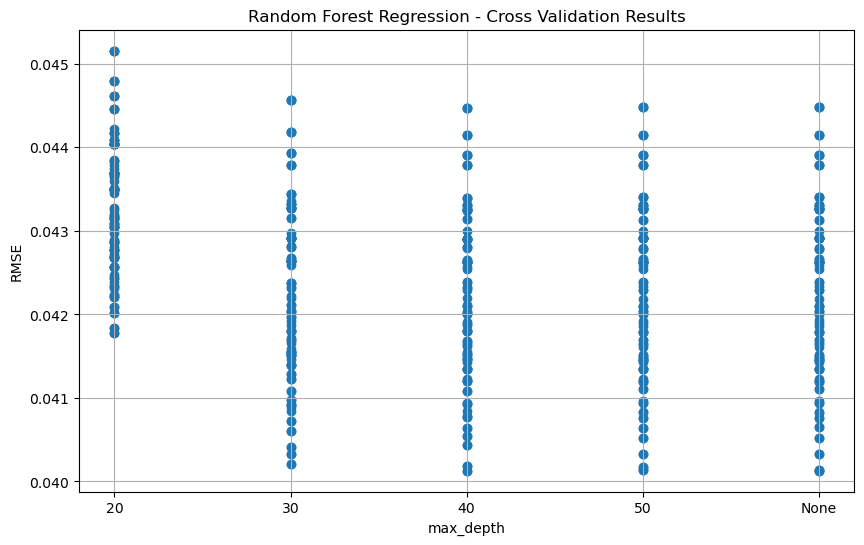

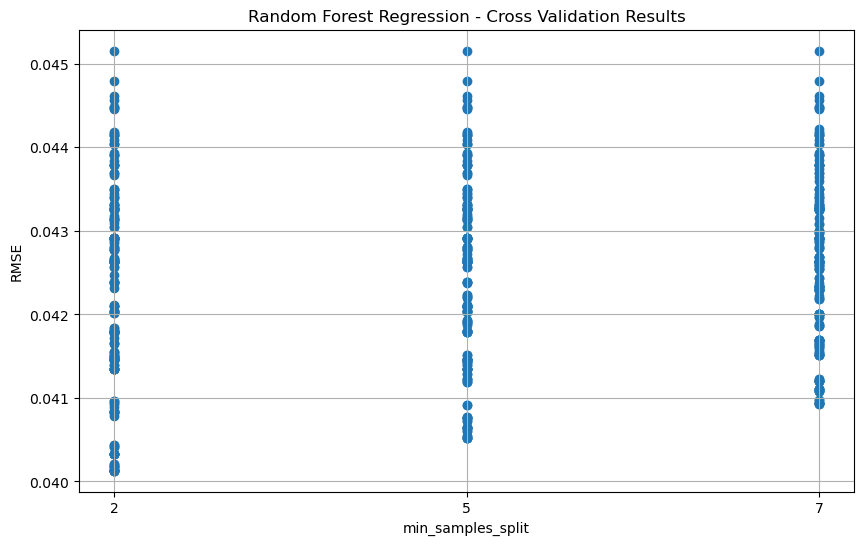

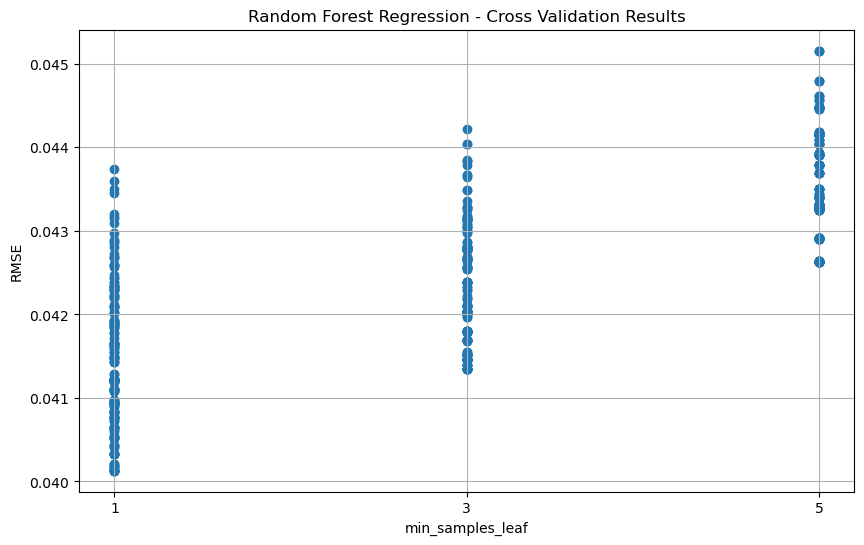

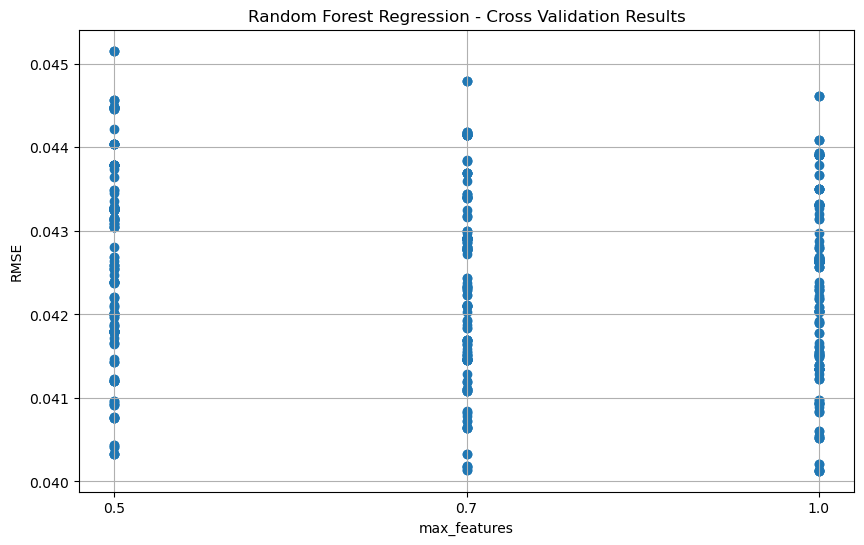

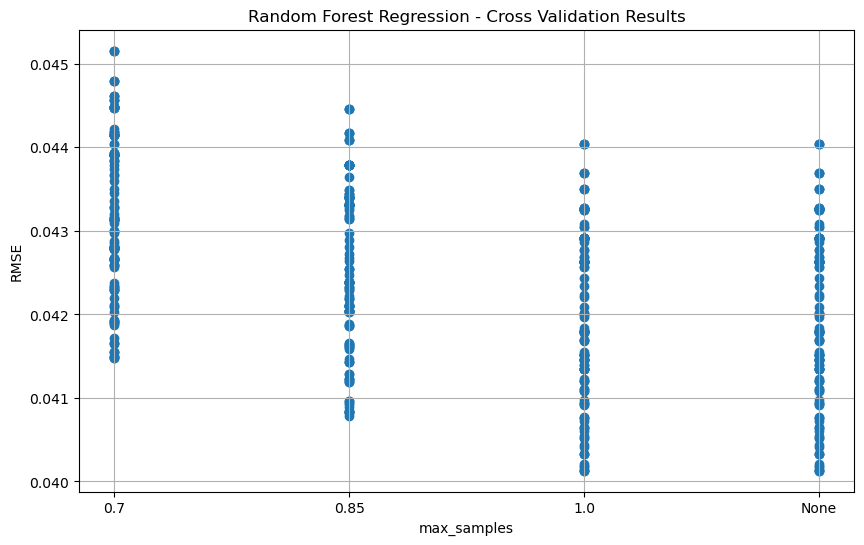

In [14]:
tunes = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_samples']

for tune in tunes:
    plt.figure(figsize=(10,6))
    plt.scatter(df[tune], df['mse']**0.5, marker='o', label=tune)
    plt.xlabel(tune)
    plt.ylabel('RMSE')
    plt.title('Random Forest Regression - Cross Validation Results')
    plt.grid()
    plt.show()

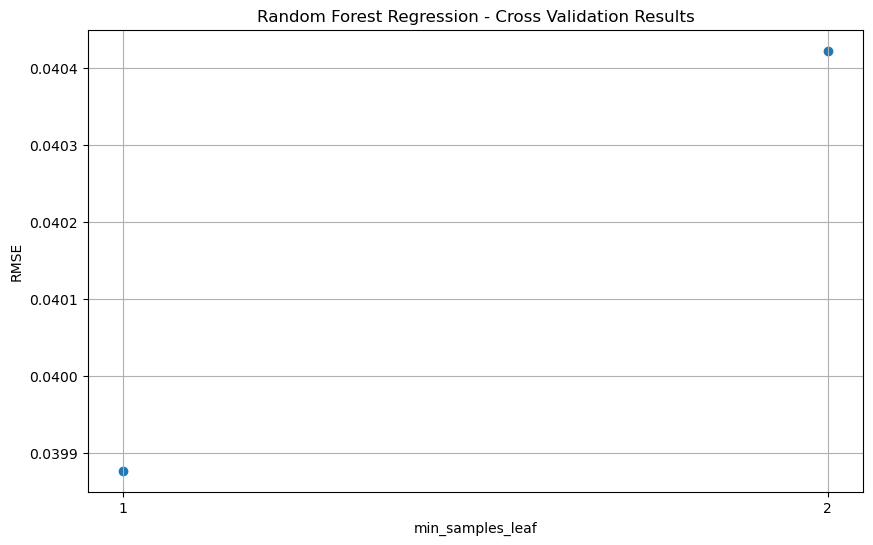

In [15]:
ds = xr.load_dataset(r'C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor\data\intermediate\CV_results\performance_cube_test.nc')
ds = ds.squeeze()
ds = ds.mean(dim='cv_fold')
df = ds.to_dataframe().reset_index()
df

tunes = ['min_samples_leaf']

for tune in tunes:
    plt.figure(figsize=(10,6))
    plt.scatter(df[tune], df['mse']**0.5, marker='o', label=tune)
    plt.xlabel(tune)
    plt.ylabel('RMSE')
    plt.title('Random Forest Regression - Cross Validation Results')
    plt.grid()
    plt.show()